## Import libraries and extract the data

In [16]:
import pandas as pd
import numpy as np
import zipfile
import os

In [8]:
!kaggle competitions download -c playground-series-s4e2


  0%|          | 0.00/917k [00:00<?, ?B/s]
100%|██████████| 917k/917k [00:02<00:00, 381kB/s]
100%|██████████| 917k/917k [00:02<00:00, 376kB/s]


In [18]:
zip_file_path = os.path.join(os.getcwd(), 'playground-series-s4e2.zip')

extract_dir = os.getcwd()

with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extractall(extract_dir)


Extraction complete.


In [37]:
#Frequent consumption of high caloric food (FAVC)
#Frequency of consumption of vegetables (FCVC)
#Number of main meals (NCP)
#Consumption of food between meals (CAEC)
#Consumption of water daily (CH20)
#Consumption of alcohol (CALC) 
#Calories consumption monitoring (SCC)
#Physical activity frequency (FAF)
#Time using technology devices (TUE)
#Transportation used (MTRANS)

## EDA

In [84]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')
sample_submission = pd.read_csv('sample_submission.csv')

In [24]:
train.head()

,id,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,0,Male,24.443011,1.699998,81.669950,yes,yes,2.000000,2.983297,Sometimes,no,2.763573,no,0.000000,0.976473,Sometimes,Public_Transportation,Overweight_Level_II
1,1,Female,18.000000,1.560000,57.000000,yes,yes,2.000000,3.000000,Frequently,no,2.000000,no,1.000000,1.000000,no,Automobile,Normal_Weight
2,2,Female,18.000000,1.711460,50.165754,yes,yes,1.880534,1.411685,Sometimes,no,1.910378,no,0.866045,1.673584,no,Public_Transportation,Insufficient_Weight
3,3,Female,20.952737,1.710730,131.274851,yes,yes,3.000000,3.000000,Sometimes,no,1.674061,no,1.467863,0.780199,Sometimes,Public_Transportation,Obesity_Type_III
4,4,Male,31.641081,1.914186,93.798055,yes,yes,2.679664,1.971472,Sometimes,no,1.979848,no,1.967973,0.931721,Sometimes,Public_Transportation,Overweight_Level_II


In [36]:
train[['id','NObeyesdad']].groupby('NObeyesdad')['id'].nunique()

NObeyesdad
Insufficient_Weight    2523
Normal_Weight          3082
Obesity_Type_I         2910
Obesity_Type_II        3248
Obesity_Type_III       4046
Overweight_Level_I     2427
Overweight_Level_II    2522
Name: id, dtype: int64

In [42]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20758 entries, 0 to 20757
Data columns (total 18 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              20758 non-null  int64  
 1   Gender                          20758 non-null  object 
 2   Age                             20758 non-null  float64
 3   Height                          20758 non-null  float64
 4   Weight                          20758 non-null  float64
 5   family_history_with_overweight  20758 non-null  object 
 6   FAVC                            20758 non-null  object 
 7   FCVC                            20758 non-null  float64
 8   NCP                             20758 non-null  float64
 9   CAEC                            20758 non-null  object 
 10  SMOKE                           20758 non-null  object 
 11  CH2O                            20758 non-null  float64
 12  SCC                             

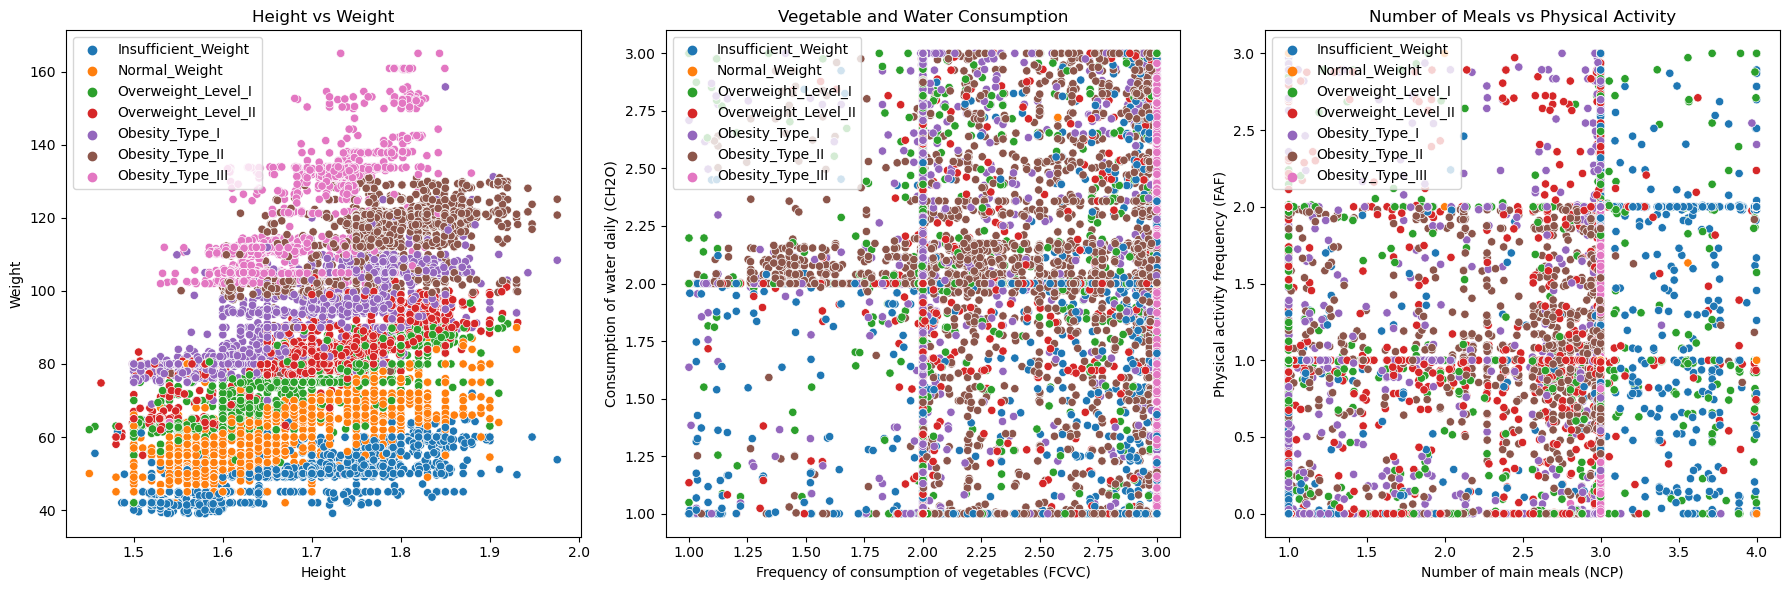

In [63]:
#Let's look at how some variables could potentially explain the obesity

import matplotlib.pyplot as plt
import seaborn as sns


order = [
    "Insufficient_Weight",
    "Normal_Weight",
    "Overweight_Level_I",
    "Overweight_Level_II",
    "Obesity_Type_I",
    "Obesity_Type_II",
    "Obesity_Type_III"
]

fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(18, 6))

sns.scatterplot(x='Height', y='Weight', hue='NObeyesdad', data=train, ax=axes[0], hue_order=order)
axes[0].set_title("Height vs Weight")
axes[0].set_xlabel("Height")
axes[0].set_ylabel("Weight")
axes[0].legend()

sns.scatterplot(x='FCVC', y='CH2O', hue='NObeyesdad', data=train, ax=axes[1], hue_order=order)
axes[1].set_title("Vegetable and Water Consumption")
axes[1].set_xlabel("Frequency of consumption of vegetables (FCVC)")
axes[1].set_ylabel("Consumption of water daily (CH2O)")
axes[1].legend()

sns.scatterplot(x='NCP', y='FAF', hue='NObeyesdad', data=train, ax=axes[2], hue_order=order)
axes[2].set_title("Number of Meals vs Physical Activity")
axes[2].set_xlabel("Number of main meals (NCP)")
axes[2].set_ylabel("Physical activity frequency (FAF)")
axes[2].legend()

plt.tight_layout()
plt.show()

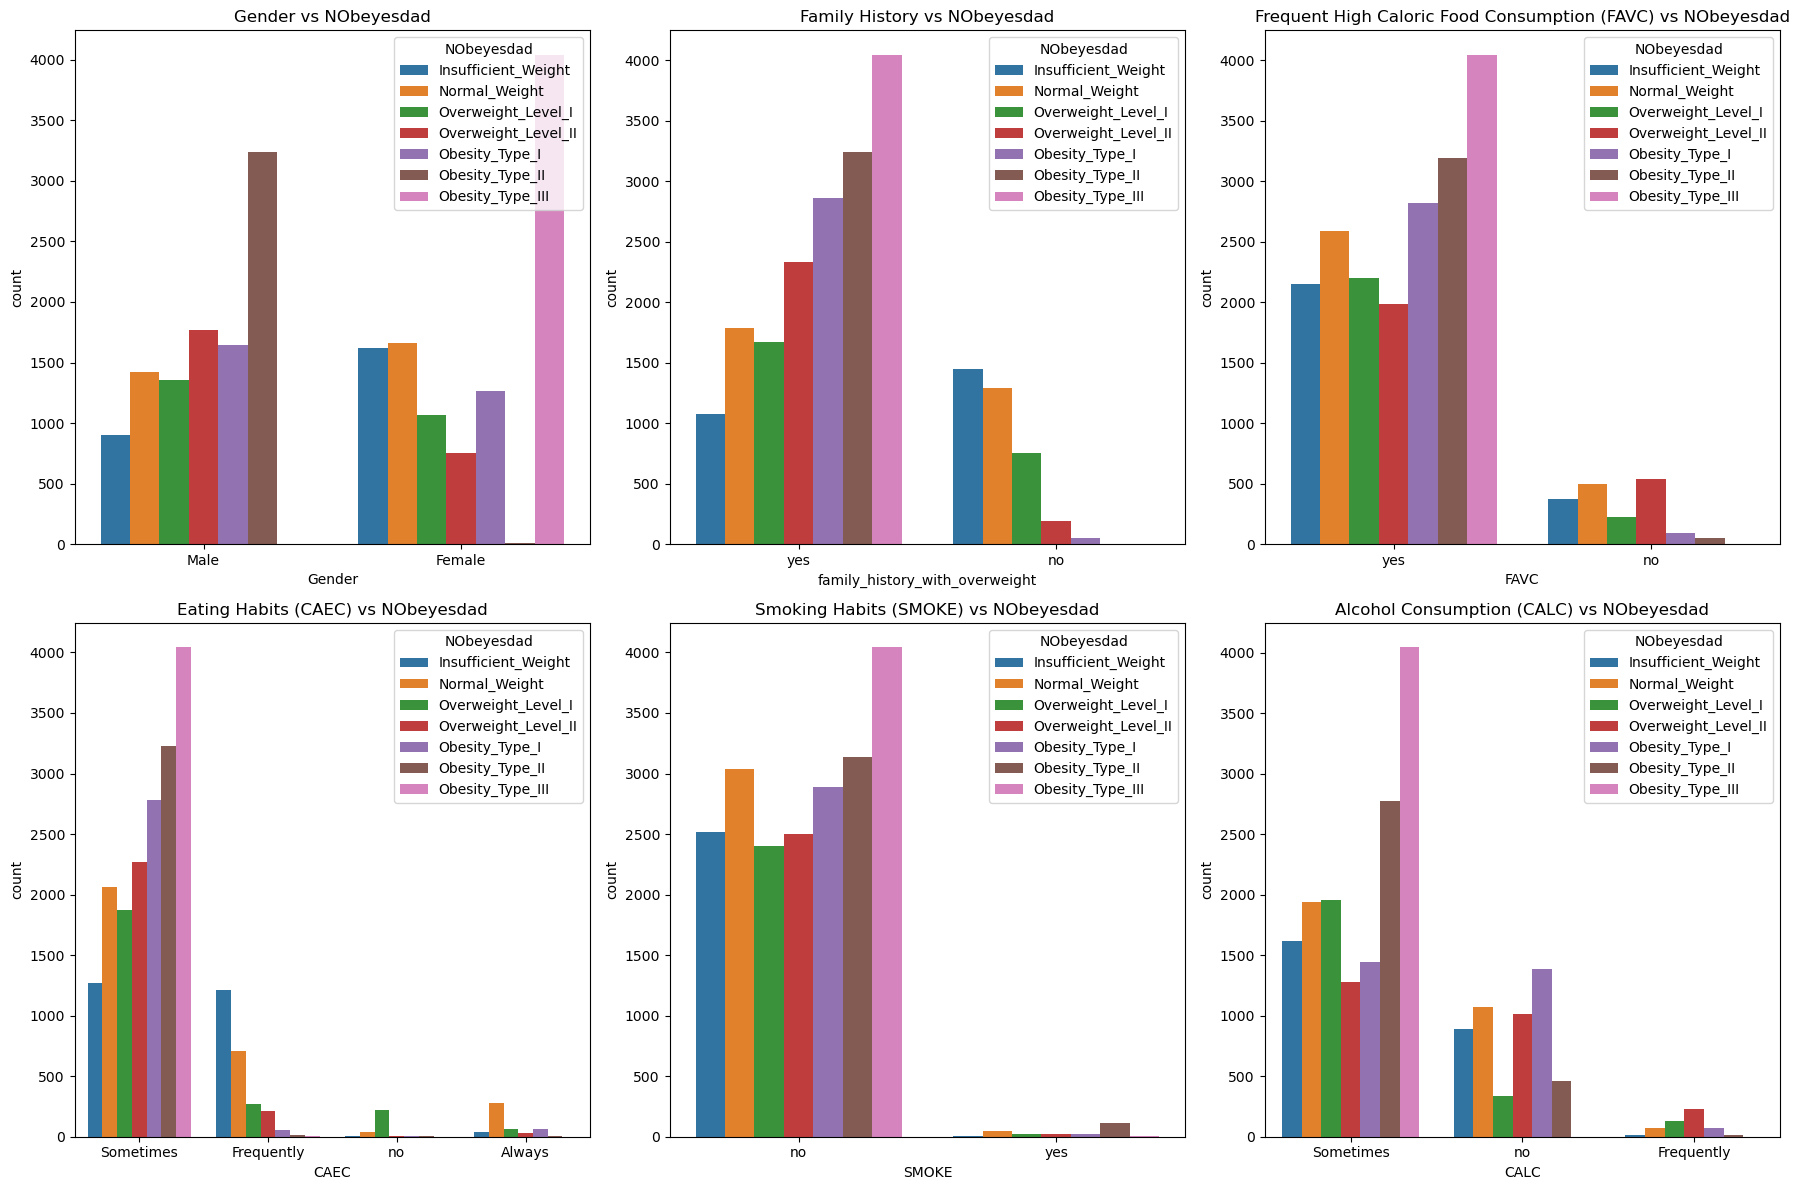

In [49]:

fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(18, 12))

sns.countplot(x='Gender', hue='NObeyesdad', data=train, ax=axes[0, 0], hue_order=order)
axes[0, 0].set_title("Gender vs NObeyesdad")

sns.countplot(x='family_history_with_overweight', hue='NObeyesdad', data=train, ax=axes[0, 1], hue_order=order)
axes[0, 1].set_title("Family History vs NObeyesdad")

sns.countplot(x='FAVC', hue='NObeyesdad', data=train, ax=axes[0, 2], hue_order=order)
axes[0, 2].set_title("Frequent High Caloric Food Consumption (FAVC) vs NObeyesdad")

sns.countplot(x='CAEC', hue='NObeyesdad', data=train, ax=axes[1, 0], hue_order=order)
axes[1, 0].set_title("Eating Habits (CAEC) vs NObeyesdad")

sns.countplot(x='SMOKE', hue='NObeyesdad', data=train, ax=axes[1, 1], hue_order=order)
axes[1, 1].set_title("Smoking Habits (SMOKE) vs NObeyesdad")

sns.countplot(x='CALC', hue='NObeyesdad', data=train, ax=axes[1, 2], hue_order=order)
axes[1, 2].set_title("Alcohol Consumption (CALC) vs NObeyesdad")

plt.tight_layout()
plt.show()



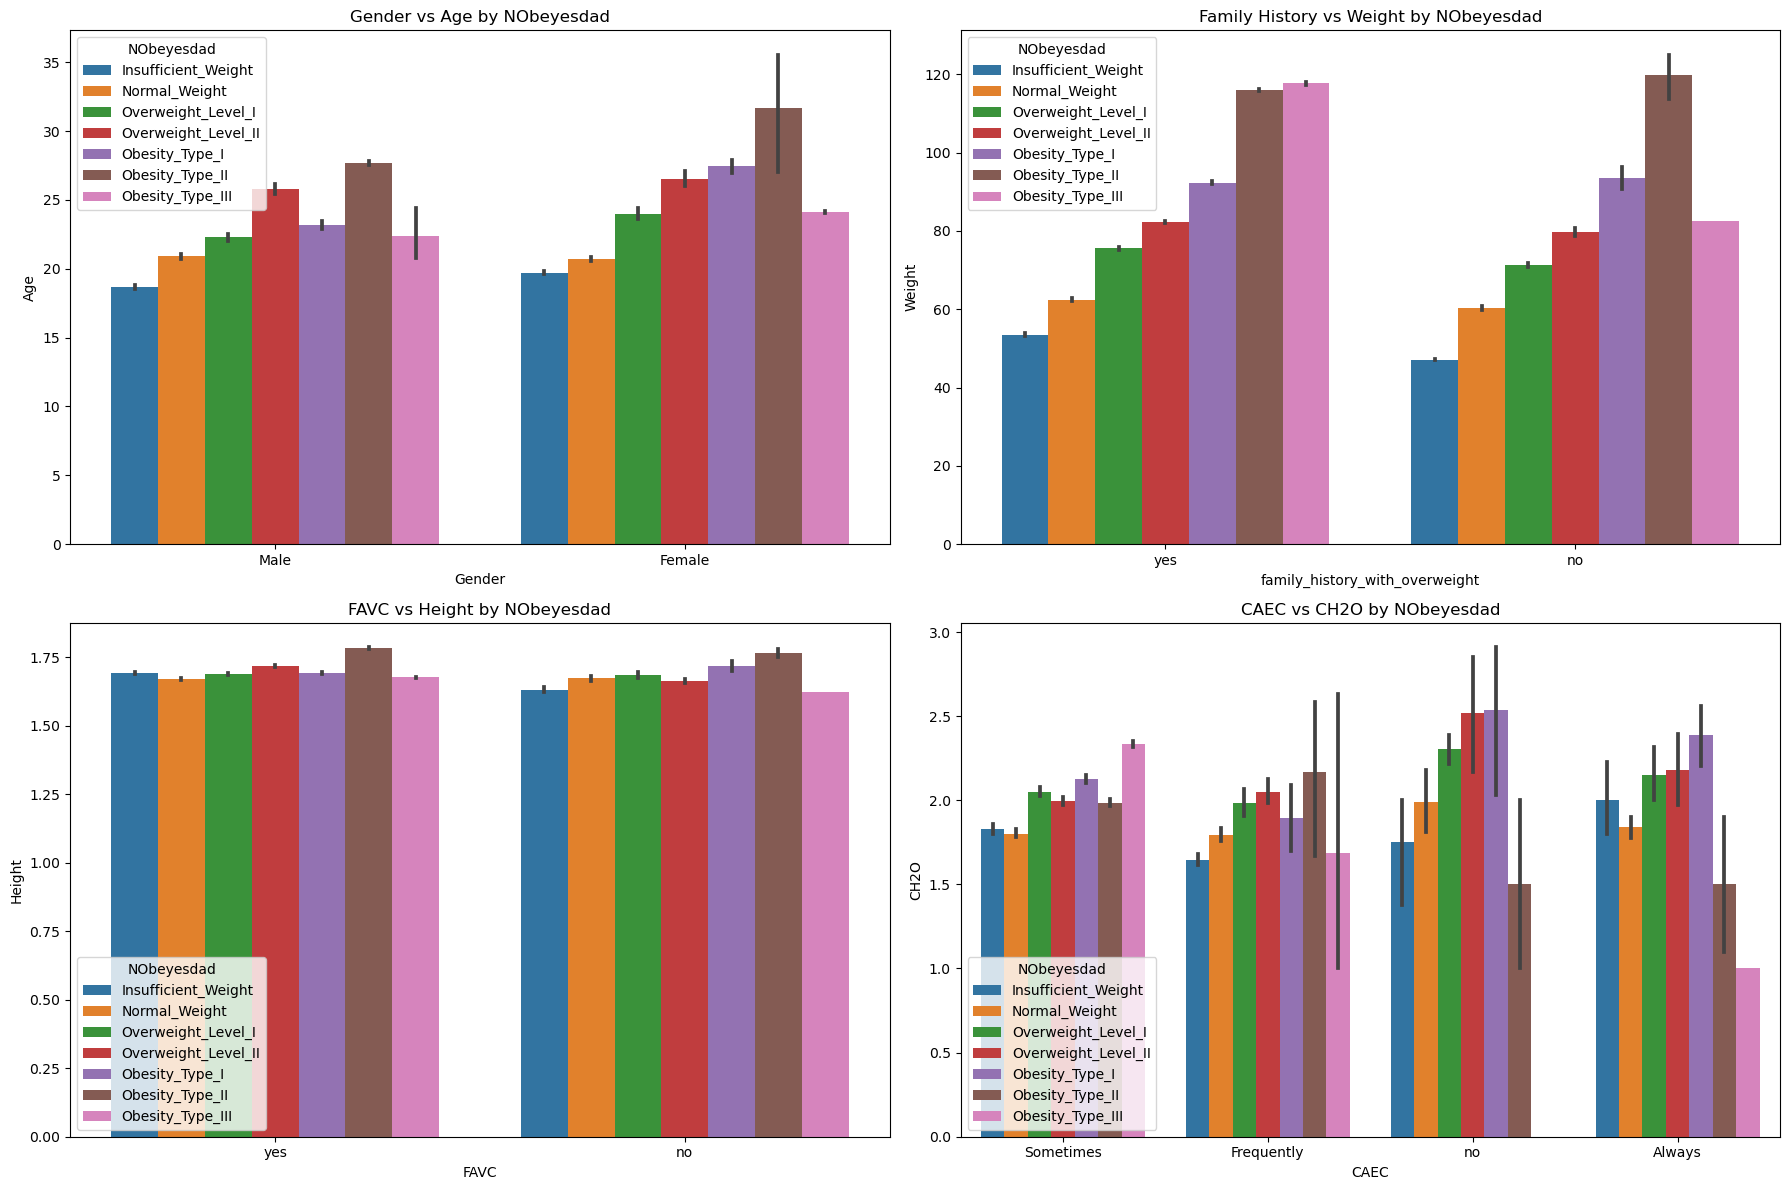

In [50]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(18, 12))

sns.barplot(x='Gender', y='Age', hue='NObeyesdad', data=train, ax=axes[0, 0], hue_order=order)
axes[0, 0].set_title("Gender vs Age by NObeyesdad")

sns.barplot(x='family_history_with_overweight', y='Weight', hue='NObeyesdad', data=train, ax=axes[0, 1], hue_order=order)
axes[0, 1].set_title("Family History vs Weight by NObeyesdad")

sns.barplot(x='FAVC', y='Height', hue='NObeyesdad', data=train, ax=axes[1, 0], hue_order=order)
axes[1, 0].set_title("FAVC vs Height by NObeyesdad")

sns.barplot(x='CAEC', y='CH2O', hue='NObeyesdad', data=train, ax=axes[1, 1], hue_order=order)
axes[1, 1].set_title("CAEC vs CH2O by NObeyesdad")

plt.tight_layout()
plt.show()


After this initial EDA we are able to see how different variables could have a good explanatory power in determining the obesity risk of a person.
1. As it could be expected, *Height* and *Weight* play an important role in obesity risk. Although a larger height could mean a larger weight as well, in some cases understanding the BMC (body mass index = height vs weight) could be useful.
2. For vegetable and water consumption, there doesn't seem to be a clear trend but most of the people with *Obesity_Type_III* have a frequent consumption of vegetables. Rather than the consumption itself, it could be related to the amount of food these people eat on a normal day.
3. Having a family history, consuming high calorie foods and snacking between meals also seems to play an important role to explain this variable.

## Modeling stage

For this excercise I'll see the performance of three models:
1. XGBoost
2. Logistic Regression 
3. Logistic Regression with PCA

### XGBoost

In [82]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from xgboost import XGBClassifier, plot_importance
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [99]:
# Create a mapping dictionary for 'NObeyesdad' using the previous order
category_mapping = {category: code for code, category in enumerate(order, start=0)}

train['NObeyesdad'] = train['NObeyesdad'].map(category_mapping)

## One-hot encoding
categorical_vars = ['Gender', 'family_history_with_overweight', 'FAVC', 'CAEC', 'SMOKE', 'SCC', 'CALC', 'MTRANS']
train_encoded = pd.get_dummies(train, columns=categorical_vars)

# Separate features and target variable
X = train_encoded.drop(columns=['id', 'NObeyesdad'])
y = train_encoded['NObeyesdad']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)


In [86]:
# Run and train the model
model = XGBClassifier(use_label_encoder=False, eval_metric='mlogloss')

model.fit(X_train, y_train)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='mlogloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, objective='multi:softprob', ...)

Accuracy: 0.90
                     precision    recall  f1-score   support

Insufficient_Weight       0.94      0.94      0.94       505
      Normal_Weight       0.86      0.90      0.88       617
 Overweight_Level_I       0.81      0.72      0.76       485
Overweight_Level_II       0.80      0.83      0.81       504
     Obesity_Type_I       0.89      0.87      0.88       582
    Obesity_Type_II       0.96      0.97      0.96       650
   Obesity_Type_III       0.99      1.00      1.00       809

           accuracy                           0.90      4152
          macro avg       0.89      0.89      0.89      4152
       weighted avg       0.90      0.90      0.90      4152



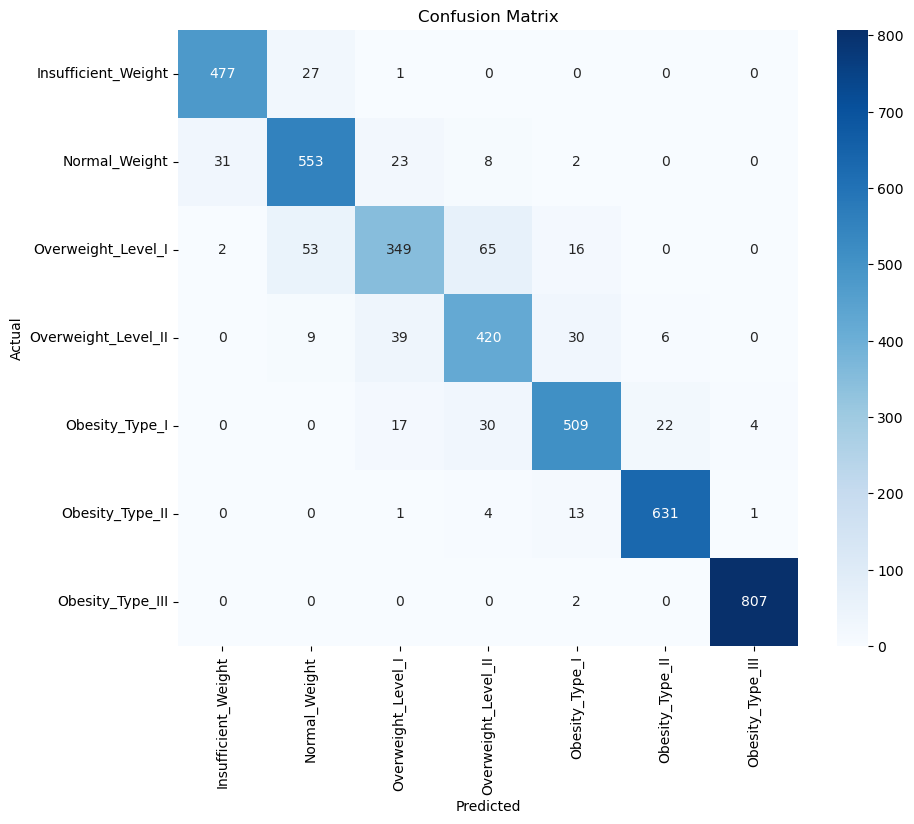

In [87]:
# Evaluate the model by predicting, calculating accuracy and plotting a confusion matrix
y_pred = model.predict(X_test)


accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')


print(classification_report(y_test, y_pred, target_names=order))


conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap='Blues', xticklabels=order, yticklabels=order)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


<Figure size 1200x800 with 0 Axes>

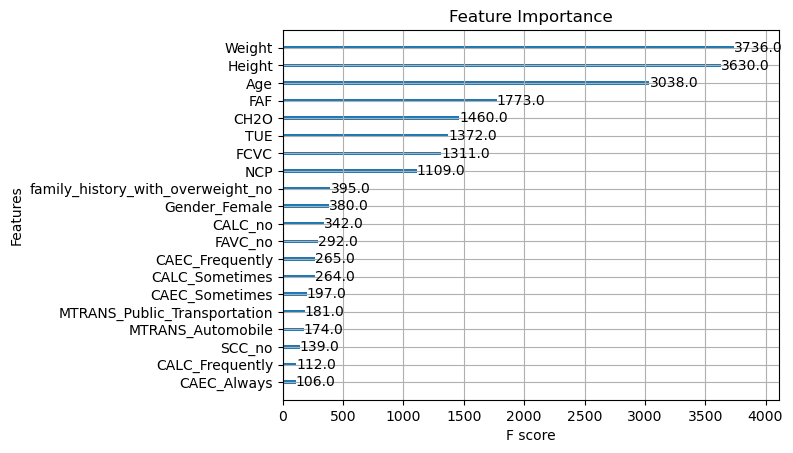

In [88]:
# Feature importance
plt.figure(figsize=(12, 8))
plot_importance(model, max_num_features=20, importance_type='weight')
plt.title('Feature Importance')
plt.show()

# Retrieve feature importance as a DataFrame
importance = model.get_booster().get_score(importance_type='weight')
importance_df = pd.DataFrame(importance.items(), columns=['Feature', 'Importance']).sort_values(by='Importance', ascending=False)

### Logistic Regression

In [89]:
from sklearn.linear_model import LogisticRegression

In [100]:
# Standardize the features that were already processed with the XGBoost
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [91]:
# Initialize the logistic regression model with multinomial setting since we have 7 categories.
model = LogisticRegression(multi_class='multinomial', solver='lbfgs', max_iter=1000)

model.fit(X_train_scaled, y_train)


LogisticRegression(max_iter=1000, multi_class='multinomial')

Accuracy: 0.86
                     precision    recall  f1-score   support

Insufficient_Weight       0.89      0.95      0.92       505
      Normal_Weight       0.84      0.82      0.83       617
 Overweight_Level_I       0.75      0.65      0.70       485
Overweight_Level_II       0.71      0.71      0.71       504
     Obesity_Type_I       0.81      0.85      0.83       582
    Obesity_Type_II       0.93      0.96      0.95       650
   Obesity_Type_III       1.00      1.00      1.00       809

           accuracy                           0.86      4152
          macro avg       0.85      0.85      0.85      4152
       weighted avg       0.86      0.86      0.86      4152



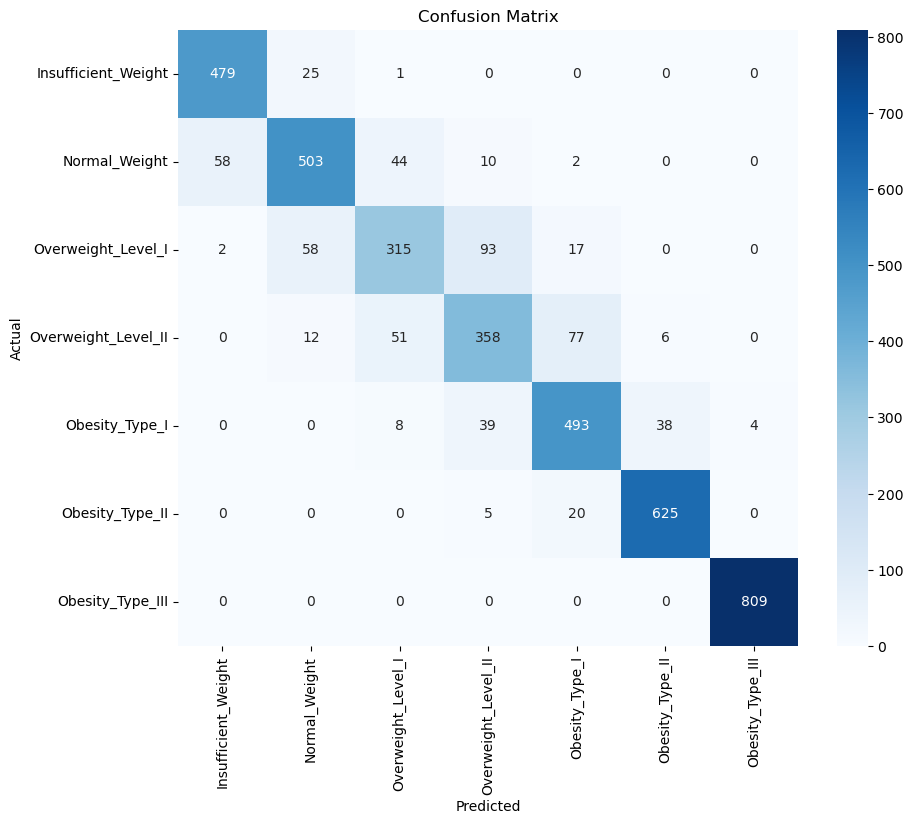

In [92]:
# Predict on test data & calculate accuracy
y_pred = model.predict(X_test_scaled)


accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')


print(classification_report(y_test, y_pred, target_names=order))


conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap='Blues', xticklabels=order, yticklabels=order)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


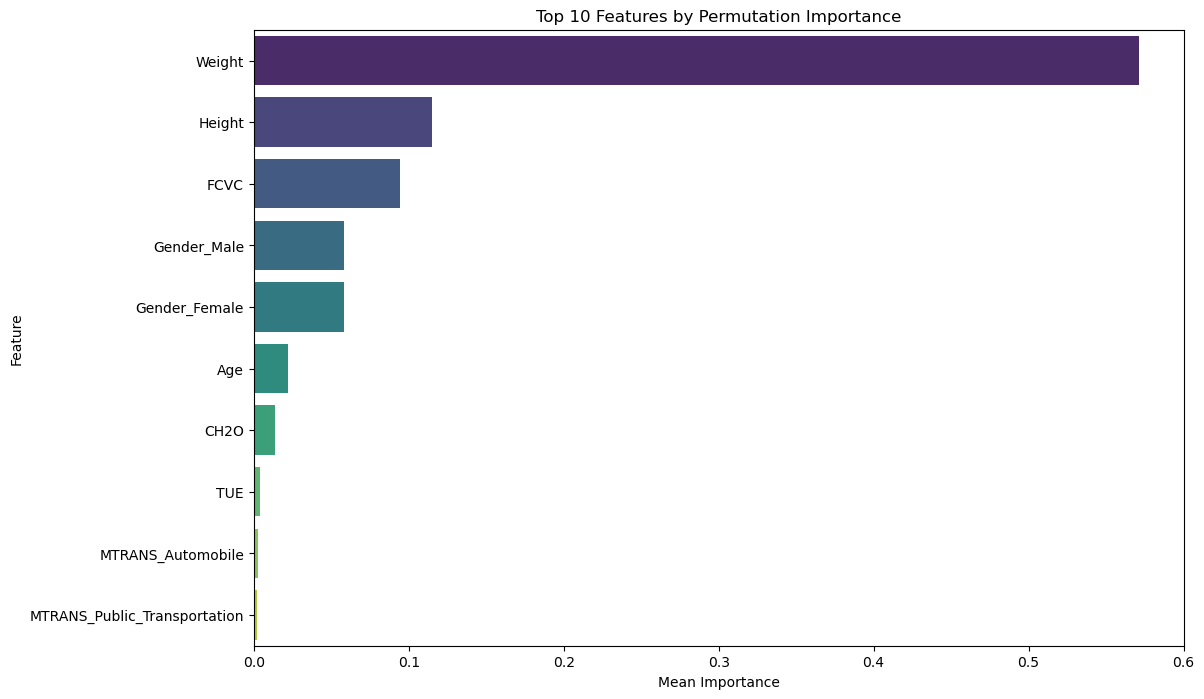

In [95]:
from sklearn.inspection import permutation_importance

#For the logistic regression we can see a permutation feature importance

perm_importance = permutation_importance(model, X_test_scaled, y_test, n_repeats=30, random_state=42)


feature_names = X.columns
perm_importance_df = pd.DataFrame({
    'feature': feature_names,
    'importance_mean': perm_importance.importances_mean,
    'importance_std': perm_importance.importances_std
})

# Sort by importance and plot results
perm_importance_df = perm_importance_df.sort_values(by='importance_mean', ascending=False)


plt.figure(figsize=(12, 8))
sns.barplot(x='importance_mean', y='feature', data=perm_importance_df.head(10), palette='viridis')
plt.title('Top 10 Features by Permutation Importance')
plt.xlabel('Mean Importance')
plt.ylabel('Feature')
plt.show()

### Logistic Regression with PCA

In [102]:
from sklearn.decomposition import PCA

#Let's start first with the PCA, dropping the columns that we don't need and scaling the data.
pca = PCA(n_components=0.95)  # Retain 95% of variance
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

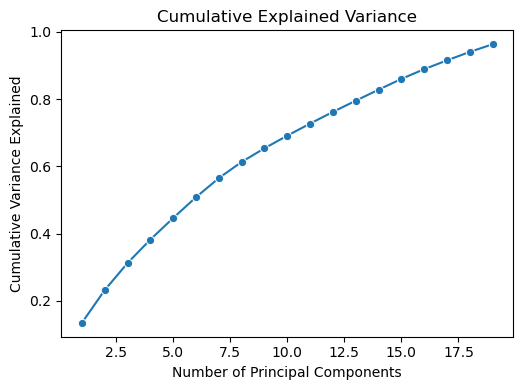

In [103]:
prop_var = pca.explained_variance_ratio_
cumulative_var = np.cumsum(prop_var)
eigenvalues = pca.explained_variance_

PC_numbers = np.arange(pca.n_components_) + 1

plt.figure(figsize=(10, 4))

plt.subplot(1, 2, 2)
sns.lineplot(x=PC_numbers, y=cumulative_var, marker='o')
plt.title('Cumulative Explained Variance')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Variance Explained')

plt.tight_layout()
plt.show()

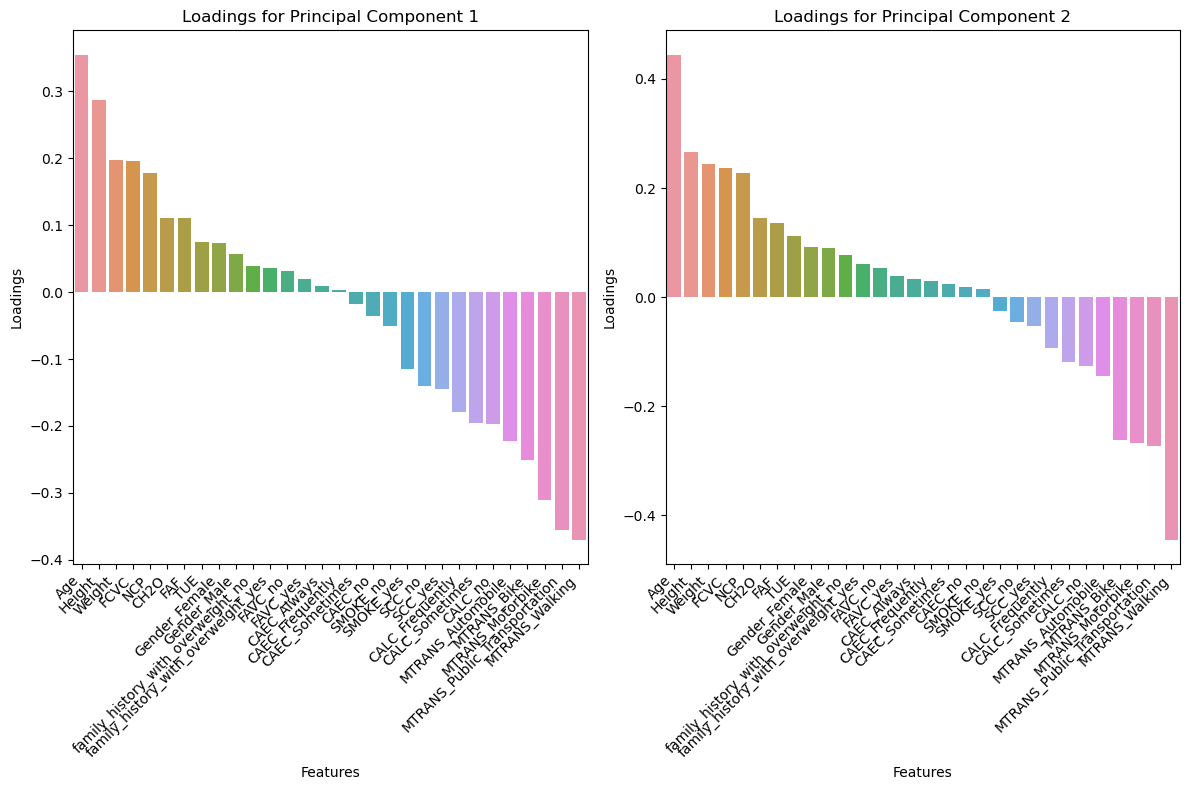

In [118]:
#We want to understand the loadings for each PCA to see if we can check any categorization.

# Calculate the loadings for each principal component
loadings = pca.components_.T
sorted_loadings = np.argsort(loadings, axis=0)[::-1]

# Define the number of components and rows for the subplots
num_components = 2
num_rows = int(np.ceil(num_components / 2))
num_cols = 2

x_labels = X_train.columns.tolist()

fig, axes = plt.subplots(nrows=num_rows, ncols=num_cols, figsize=(12, 8))

for pc_idx, ax in enumerate(axes.flatten()):
    if pc_idx < num_components:
        sorted_loading = loadings[sorted_loadings[:, pc_idx], pc_idx]
        sns.barplot(x=x_labels, y=sorted_loading, ax=ax)
        ax.set_title(f"Loadings for Principal Component {pc_idx + 1}")
        ax.set_xlabel("Features")
        ax.set_ylabel("Loadings")
        ax.set_xticklabels(x_labels, rotation=45, ha="right")

plt.tight_layout()
plt.show()

Accuracy: 0.67
                     precision    recall  f1-score   support

Insufficient_Weight       0.59      0.63      0.61       505
      Normal_Weight       0.50      0.46      0.48       617
 Overweight_Level_I       0.53      0.39      0.45       485
Overweight_Level_II       0.45      0.32      0.37       504
     Obesity_Type_I       0.53      0.70      0.60       582
    Obesity_Type_II       0.83      0.95      0.89       650
   Obesity_Type_III       0.99      1.00      0.99       809

           accuracy                           0.67      4152
          macro avg       0.63      0.64      0.63      4152
       weighted avg       0.66      0.67      0.66      4152



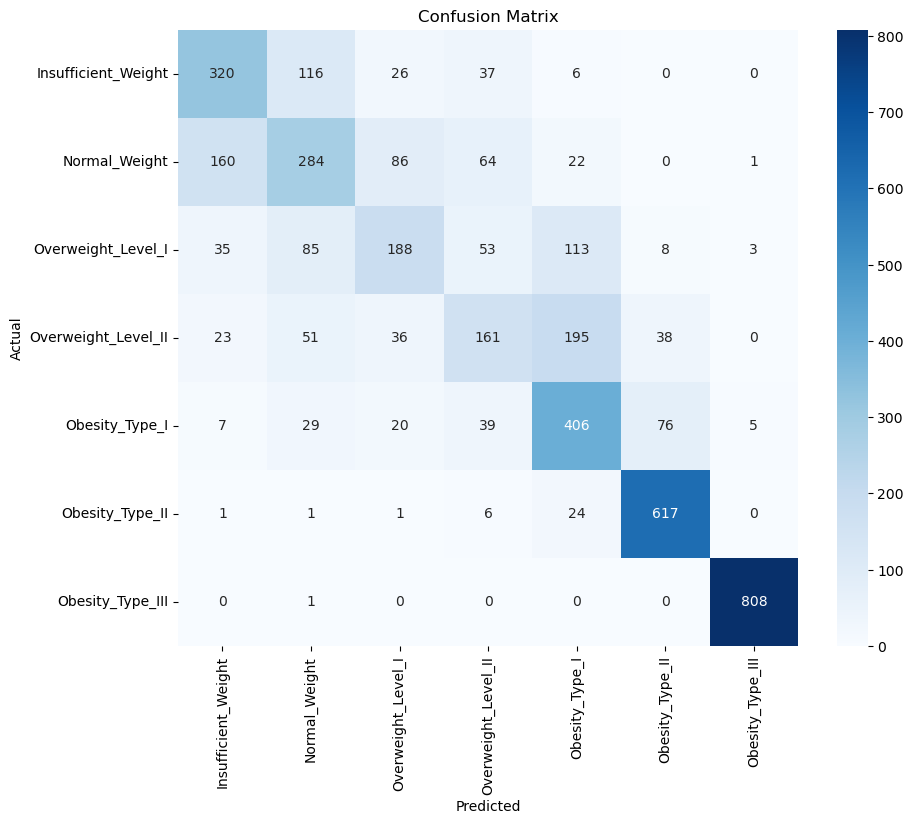

In [120]:
#Now we will perform logistic regression after the PCA
model = LogisticRegression(multi_class='multinomial', solver='lbfgs', max_iter=1000)

model.fit(X_train_pca, y_train)

y_pred = model.predict(X_test_pca)

# Calculate accuracy & plot confusion matrix
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

print(classification_report(y_test, y_pred, target_names=order))

conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap='Blues', xticklabels=order, yticklabels=order)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

As we can see, among all three models, XGBoost does a better job with overall higher results for accuracy, precision and recall. In terms of the Logistic Regression, it falls behind the XGBoost in terms of the previously mentioned metrics but it is close. Interestingly, when we apply PCA and then run a Logistic Regression, the accuracy drops notably. This is happening since for all models Height, Weight and Age play an important role to determining the Obesity Risk category and PCA is not able to find good combinations to create components that can explain the variance in the data.

For this particular problem, XGBoost showed the best performance.